Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.


Nivell 1





Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [13]:
# =======================
# 1. LIBRERÍAS Y CONFIGURACIÓN GLOBAL
import datetime as dt
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings  # Use Python's built-in warnings module

# Suppress warnings if needed
warnings.filterwarnings("ignore")

import mysql.connector

config = {
    'user': 'rociovanesa',
    'password': 'vanesa123',
    'host': 'localhost',
    'database': 'database_operations'
}

try:
    connection = mysql.connector.connect(**config)
    if connection.is_connected():
        print("Conexión exitosa a la base de datos MySQL")
except mysql.connector.Error as err:
    print(f"Error al conectar: {err}")
finally:
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("Conexión cerrada")

Conexión exitosa a la base de datos MySQL
Conexión cerrada


In [14]:
connection = mysql.connector.connect(**config)

users = pd.read_sql("SELECT * FROM users;", connection)
transactions = pd.read_sql("SELECT * FROM transactions;",connection)
credit_cards = pd.read_sql("SELECT * FROM credit_cards;", connection)
products = pd.read_sql("SELECT * FROM products;", connection)
transaction_products = pd.read_sql("SELECT * FROM transaction_products;", connection)
card_status = pd.read_sql("SELECT * FROM card_status;", connection)
companies = pd.read_sql("SELECT * FROM companies;", connection)

connection.close()

- Exercici 1
Una variable numèrica.

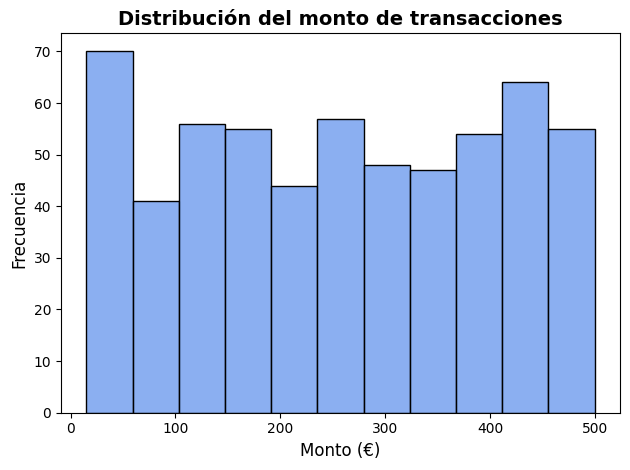

count    591.000000
mean     255.928511
std      144.017785
min       15.050000
25%      130.260000
50%      257.240000
75%      389.660000
max      499.230000
Name: amount, dtype: float64


In [ ]:
# 2. DISTRIBUCIÓN DEL MONTO DE TRANSACCIONES
# -----------------------------------------
# Histograma simple del monto de transacciones
# - kde=False: no se dibuja la curva de densidad (más limpio si hay muchos valores extremos)
sns.histplot(transactions["amount"], kde=False, color='cornflowerblue')

# Título y etiquetas
plt.title("Distribución del monto de transacciones", fontsize=14, fontweight='bold')
plt.xlabel("Monto (€)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
# Formato de los ejes
plt.tight_layout()

plt.show()



- Exercici 2
Dues variables numèriques.

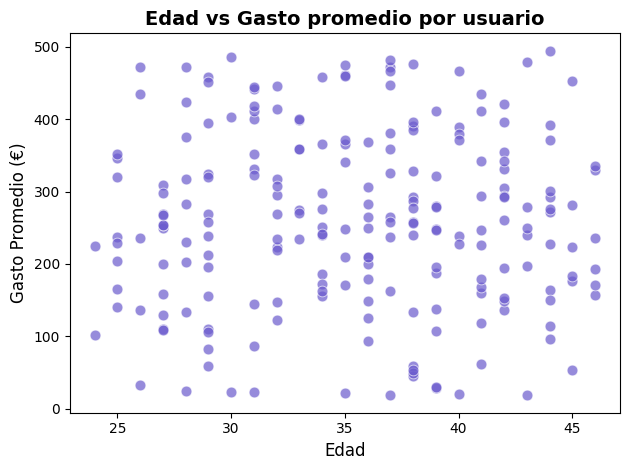

In [ ]:
# 3. DISPERSIÓN: MONTO VS USUARIO
# --------------------------------

# Calcular la edad de cada usuario a partir de la fecha de nacimiento
# - Se utiliza el año actual menos el año de nacimiento
users['age'] = pd.to_datetime('today').year - pd.to_datetime(users['birth_date']).dt.year

# Unir transacciones con usuarios para asociar cada monto con el usuario y su edad
merged = transactions.merge(users, left_on='user_id', right_on='id')

# Calcular el gasto promedio por usuario
avg_spending = merged.groupby('user_id')['amount'].mean().reset_index(name='avg_spending')

# Asociar la edad a cada usuario en el nuevo dataframe
edad_gasto = avg_spending.merge(users[['id', 'age']], left_on='user_id', right_on='id')

# Gráfico de dispersión: edad vs gasto promedio
sns.scatterplot(data=edad_gasto, x='age', y='avg_spending', alpha=0.7, s=60, color='slateblue')

# Título y etiquetas
plt.title("Edad vs Gasto promedio por usuario", fontsize=14, fontweight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Gasto Promedio (€)", fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
edad_gasto_df = edad_gasto[['user_id', 'age', 'avg_spending']].sort_values(by='avg_spending', ascending=False)
edad_gasto_df.head(10)  # puedes cambiar este número o mostrar todo si es necesario

,user_id,age,avg_spending
56,116,44,494.82
111,171,30,485.31
14,74,37,481.75
77,137,43,478.54
118,178,38,476.75
83,143,35,474.76
51,111,26,472.18
81,141,28,471.78
4,64,37,471.47
55,115,40,466.46


- Exercici 3
Una variable categòrica.

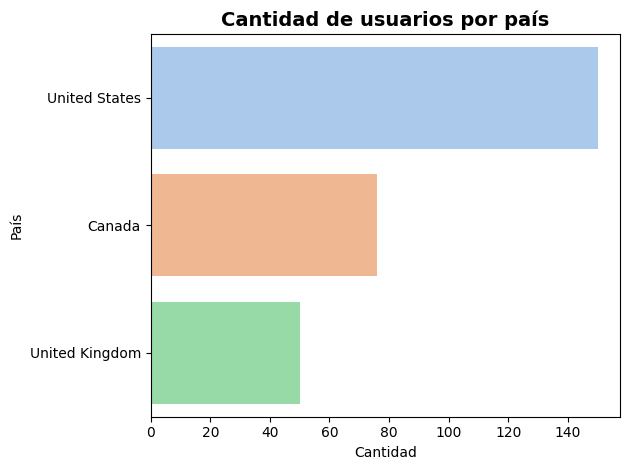

,country,user_count
0,United States,150
1,Canada,76
2,United Kingdom,50


In [ ]:
# 1. Contar usuarios por país
usuarios_por_pais = users['country'].value_counts().reset_index()
usuarios_por_pais.columns = ['country', 'user_count']

# 2. Visualización con countplot
sns.countplot(data=users, y="country", order=usuarios_por_pais['country'], palette="pastel")

plt.title("Cantidad de usuarios por país", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad")
plt.ylabel("País")
plt.tight_layout()
plt.show()

# 3. Mostrar como DataFrame ordenado
usuarios_por_pais


- Exercici 4
Una variable categòrica i una numèrica.

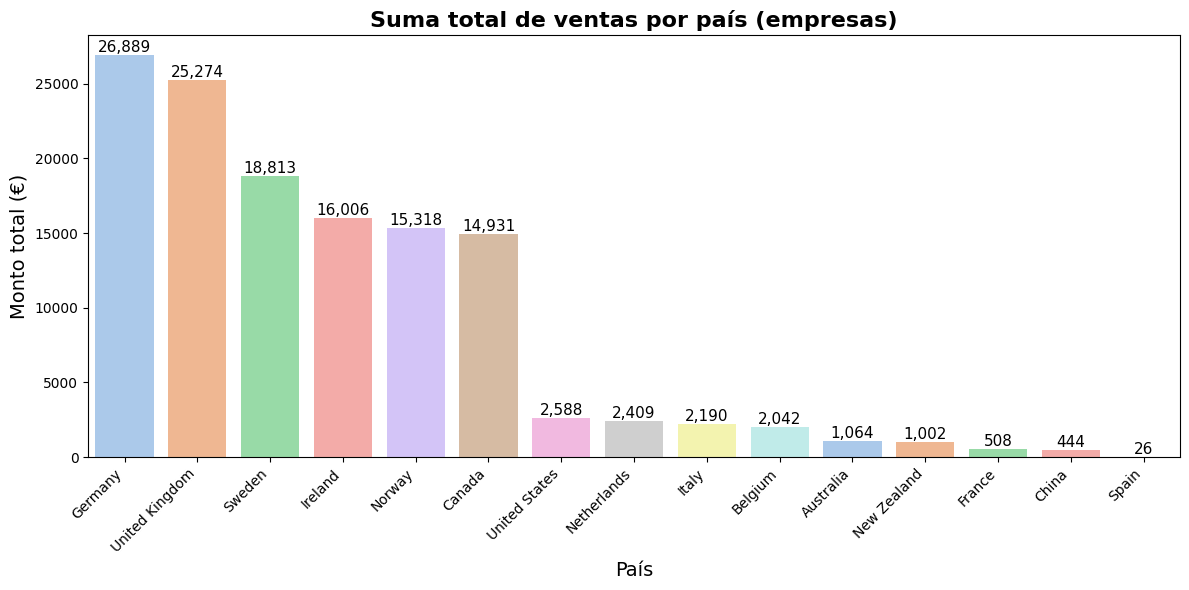

,country,amount
5,Germany,26888.55
13,United Kingdom,25274.38
12,Sweden,18813.45
6,Ireland,16006.22
10,Norway,15318.01
2,Canada,14930.69
14,United States,2587.78
8,Netherlands,2409.40
7,Italy,2190.08
1,Belgium,2041.74


In [6]:
# Merge para traer el país de la empresa (company)
df_merged = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')

# Filtrar transacciones aceptadas
df_merged = df_merged[df_merged['declined'] == False]

# Agrupar por país y sumar el monto total
df_grouped = df_merged.groupby('country')['amount'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='amount', ascending=False)  # Ordenar para mejor lectura

# Gráfico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=df_grouped, x='country', y='amount', palette='pastel')

# Título y etiquetas
plt.title('Suma total de ventas por país (empresas)', fontsize=16, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Monto total (€)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Etiquetas con valores en cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:,.0f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

# Mostrar también en formato tabla
df_grouped


- Exercici 5
Dues variables categòriques.

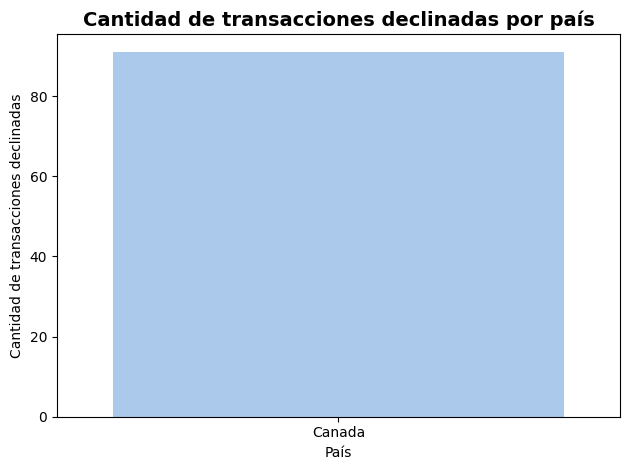

,country,declined_count
0,Canada,91


In [5]:
# Paso 1: Merge entre transactions y users para obtener país del usuario
df_merged = pd.merge(transactions, users, left_on="user_id", right_on="id")

# Paso 2: Filtrar solo transacciones declinadas
df_declined = df_merged[df_merged["declined"] == True]

# Paso 3: Agrupar por país y contar la cantidad de transacciones declinadas
declined_by_country = df_declined.groupby("country")["declined"].count().sort_values(ascending=False).reset_index()
declined_by_country.columns = ["country", "declined_count"]

# Paso 4: Visualización
sns.barplot(data=declined_by_country, x="country", y="declined_count", palette="pastel")
plt.title("Cantidad de transacciones declinadas por país", fontsize=14, fontweight='bold')
plt.xlabel("País")
plt.ylabel("Cantidad de transacciones declinadas")
plt.tight_layout()
plt.show()

# Paso 5: Mostrar como DataFrame
declined_by_country


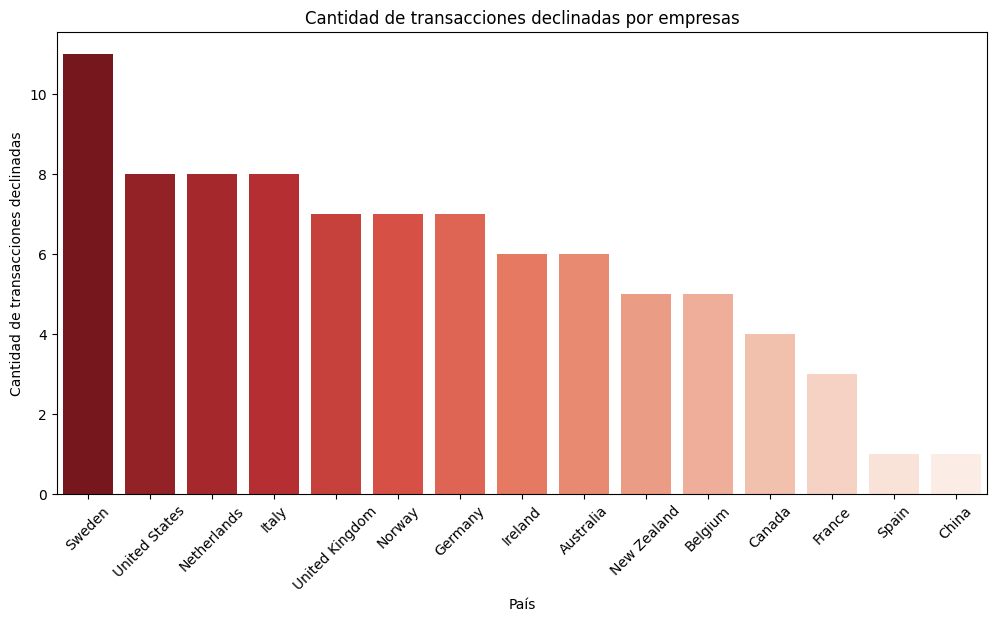

,country,declined_count
0,Sweden,11
1,United States,8
2,Netherlands,8
3,Italy,8
4,United Kingdom,7
5,Norway,7
6,Germany,7
7,Ireland,6
8,Australia,6
9,New Zealand,5


In [21]:
# Merge transactions con companies para obtener país de la empresa
df_merged = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')

# Filtrar transacciones declinadas
df_declined = df_merged[df_merged['declined'] == True]

# Contar cantidad por país
counts = df_declined['country'].value_counts().reset_index()
counts.columns = ['country', 'declined_count']

# Graficar con seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='country', y='declined_count', palette='Reds_r')
plt.title('Cantidad de transacciones declinadas por empresas')
plt.xlabel('País')
plt.ylabel('Cantidad de transacciones declinadas')
plt.xticks(rotation=45)
plt.show()
# Mostrar como DataFrame
counts


- Exercici 6
Tres variables.

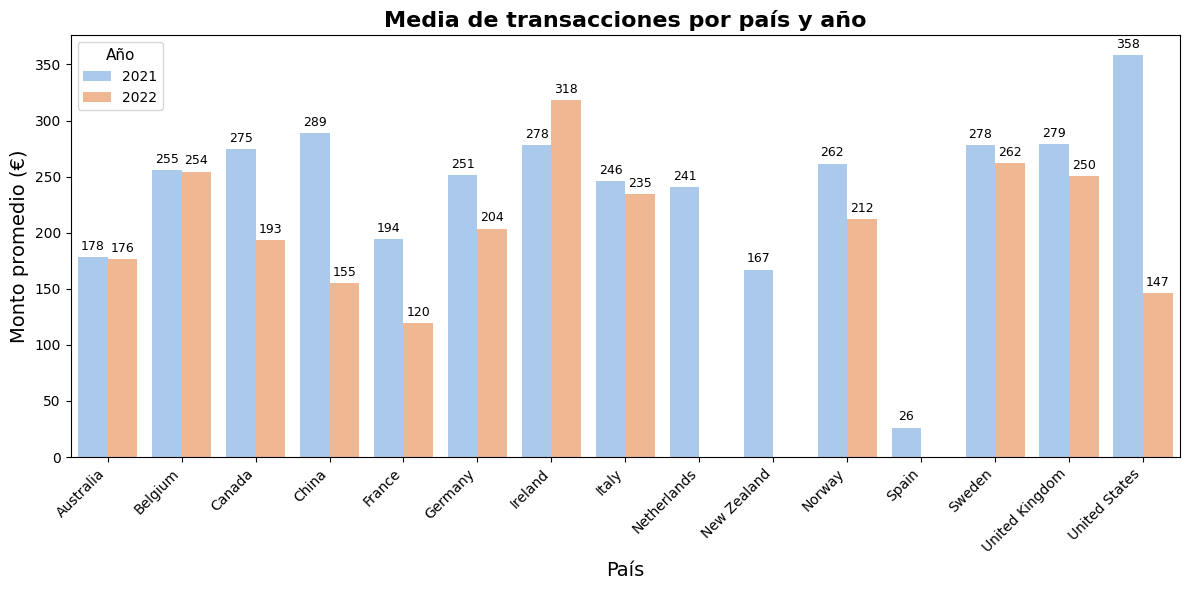

,country,year,amount
0,Australia,2021,178.183333
1,Australia,2022,176.480000
2,Belgium,2021,255.483333
3,Belgium,2022,254.420000
4,Canada,2021,274.858333
5,Canada,2022,193.054444
6,China,2021,289.040000
7,China,2022,155.440000
8,France,2021,194.275000
9,France,2022,119.680000


In [9]:
# Asegurar formato datetime
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])
df_merged['year'] = df_merged['timestamp'].dt.year
# Agrupar por país y año, calcular promedio del monto
df_mean = df_merged.groupby(['country', 'year'])['amount'].mean().reset_index()

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=df_mean, x='country', y='amount', hue='year', palette='pastel')

# Título y etiquetas
plt.title('Media de transacciones por país y año', fontsize=16, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Monto promedio (€)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', fontsize=10, title_fontsize=11)

# Mostrar etiquetas con los valores de cada barra
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar como tabla para análisis
df_mean.sort_values(by=["country", "year"])


- Exercici 7
Graficar un Pairplot.

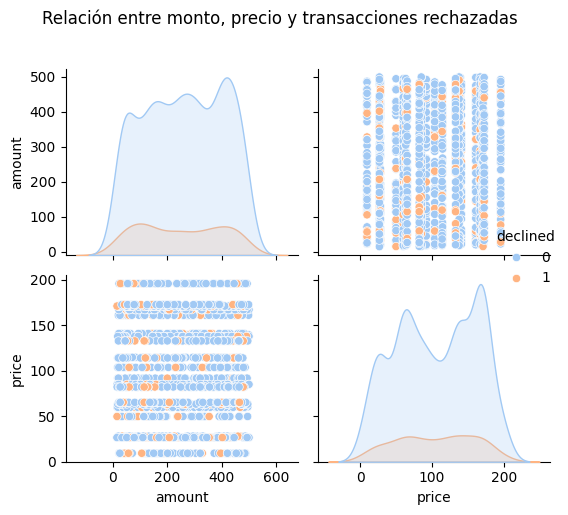


Estadísticas por transacción rechazada o no:
         amount                            price                          
          count        mean    min     max count        mean   min     max
declined                                                                  
0          1236  258.834183  15.05  499.23  1236  105.897953  9.24  195.94
1           221  247.664389  15.38  490.19   221  104.394887  9.24  195.94


In [22]:
# 1. Cargar los datos necesarios
# Supone que ya tienes cargadas las tablas: products, transaction_products, transactions

# 2. Hacer merge entre 'transaction_products' y 'products' para obtener el precio de cada producto
df_tp = pd.merge(
    transaction_products,
    products[['id', 'price']],           # Solo nos interesa el precio del producto
    left_on='product_id',
    right_on='id',
    how='left'
)

# 3. Merge con 'transactions' para traer información de cada transacción: amount total y si fue rechazada
df_trans_tp = pd.merge(
    df_tp,
    transactions[['id', 'amount', 'declined']],  # Solo tomamos columnas relevantes
    left_on='transaction_id',
    right_on='id',
    how='left'
)

# 4. Limpiar columnas innecesarias y renombrar si hace falta
# Nos quedamos solo con si fue rechazada (declined), el monto total (amount) y el precio individual del producto (price)
df_pairplot = df_trans_tp[['declined', 'amount', 'price']]

# 5. Visualización: Pairplot para ver relaciones entre variables y clases (rechazada o no)
#    - hue='declined' para colorear por si fue rechazada
#    - diag_kind='kde' usa curvas de densidad en la diagonal
#    - palette='Set2' para una paleta amigable
sns.pairplot(
    df_pairplot,
    hue='declined',
    diag_kind='kde',
    palette='pastel'
)

# 6. Título general del gráfico
plt.suptitle("Relación entre monto, precio y transacciones rechazadas", y=1.02)
plt.tight_layout()

# 7. Mostrar el gráfico
plt.show()

# --- Validación de datos: estadísticas agrupadas por transacciones rechazadas o no ---

stats_declined = df_pairplot.groupby('declined')[['amount', 'price']].agg(['count', 'mean', 'min', 'max'])
print("\nEstadísticas por transacción rechazada o no:")
print(stats_declined)


Nivell 2
Exercici 1
Correlació de totes les variables numèriques.

Matriz de correlación:
           ventas     price    amount
ventas  1.000000  0.036049  0.925392
price   0.036049  1.000000  0.070446
amount  0.925392  0.070446  1.000000


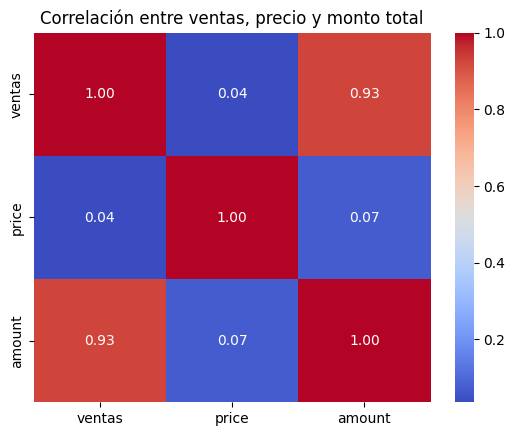

In [23]:
# 1. Calcular cantidad de ventas por producto
ventas = transaction_products.groupby('product_id').size().reset_index(name='ventas')

# 2. Unir con productos para obtener el precio
df = pd.merge(ventas, products[['id', 'price']], left_on='product_id', right_on='id')

# 3. Unir con transacciones para obtener el monto (amount) asociado a cada producto
# Primero, merge transaction_products con transactions para tener amount por transaction_id
tp_trans = pd.merge(transaction_products, transactions[['id', 'amount']], left_on='transaction_id', right_on='id')

# 4. Calcular monto total por producto (sumando amount de todas sus transacciones)
monto_producto = tp_trans.groupby('product_id')['amount'].sum().reset_index()

# 5. Merge monto con df
df = pd.merge(df, monto_producto, on='product_id')

# 6. Ahora df tiene columnas: product_id, ventas, price, amount (monto total)

# 7. Calcular matriz de correlación
corr = df[['ventas', 'price', 'amount']].corr()

print("Matriz de correlación:\n", corr)

# 8. Visualizar matriz con heatmap
plt.tight_layout()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre ventas, precio y monto total")
plt.show()

Exercici 2
Implementa un jointplot.

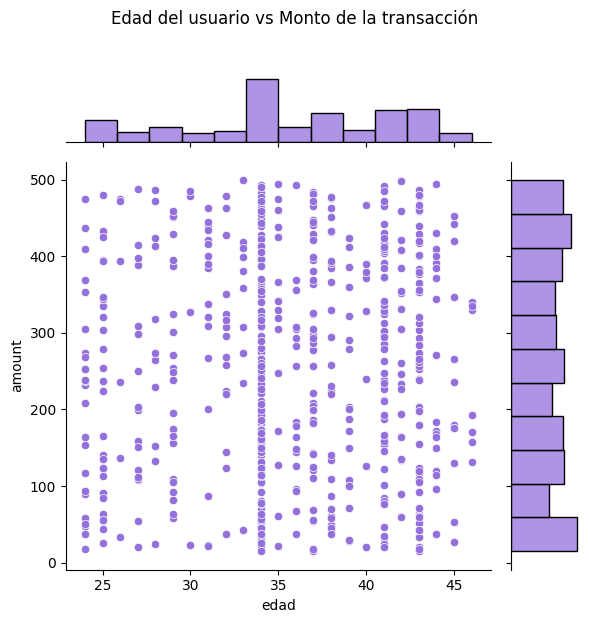

Estadísticas de monto agrupadas por edad:
   edad  count        mean    min     max
0    24     24  214.200833  17.97  474.70
1    25     27  221.824815  25.78  479.52
2    26      6  291.011667  33.10  475.06
3    27     17  222.613529  20.33  487.64
4    28     12  276.873333  24.50  486.54

Primeras filas del DataFrame con edad y monto:
   edad  amount
0    41  466.92
1    38   49.53
2    43   92.61
3    26  394.18
4    41  279.93


In [24]:

# 1. Asegurarse que la columna 'birth_date' está en formato datetime para poder manipular fechas
users['birth_date'] = pd.to_datetime(users['birth_date'])

# 2. Calcular la edad actual de cada usuario a partir del año de su fecha de nacimiento
# Usamos el año actual - año de nacimiento
users['edad'] = pd.Timestamp.now().year - users['birth_date'].dt.year

# 3. Unir (merge) las tablas 'transactions' y 'users' para tener en un solo DataFrame
# la información del monto ('amount') y la edad ('edad') del usuario.
# Se hace merge con left_on = 'user_id' (en transactions) y right_on = 'id' (en users)
df = transactions.merge(users[['id', 'edad']], left_on='user_id', right_on='id')

# 4. Visualización: Gráfico de dispersión para observar la relación entre edad y monto
sns.jointplot(data=df, x='edad', y='amount', kind='scatter', color='mediumpurple')
plt.suptitle("Edad del usuario vs Monto de la transacción", y=1.03)
plt.tight_layout()
plt.show()

# --- CORROBORACIÓN EN PANDAS ---

# Estadísticas descriptivas del monto agrupadas por edad
stats_por_edad = df.groupby('edad')['amount'].agg(['count', 'mean', 'min', 'max']).reset_index()
print("Estadísticas de monto agrupadas por edad:")
print(stats_por_edad.head())

# Mostrar las primeras filas del DataFrame resultante con edad y monto para verificar datos
print("\nPrimeras filas del DataFrame con edad y monto:")
print(df[['edad', 'amount']].head())


Nivell 3
Exercici 1
Implementa un violinplot combinat amb un altre tipus de gràfic.

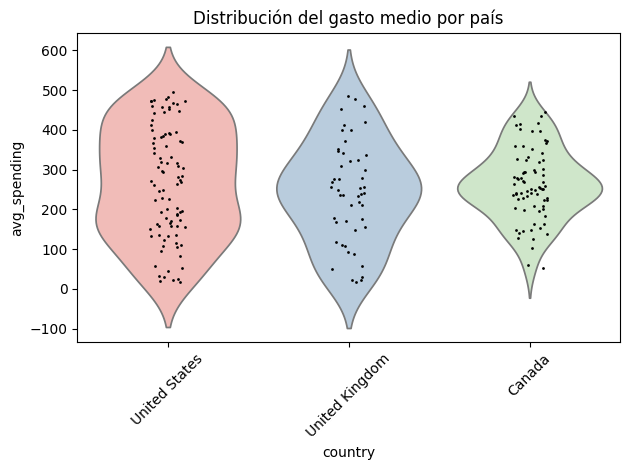


Gasto medio por país:
          country  avg_spending
0   United States    267.305430
1          Canada    263.660334
2  United Kingdom    243.308100


In [25]:
df_violin = pd.merge(users[["id", "country"]], avg_spending, left_on="id", right_on="user_id")

sns.violinplot(data=df_violin, x="country", y="avg_spending", inner=None, palette="Pastel1")
sns.stripplot(data=df_violin, x="country", y="avg_spending", color="k", size=2, jitter=True)
plt.title("Distribución del gasto medio por país")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nGasto medio por país:")
print(df_violin.groupby("country")["avg_spending"].mean().sort_values(ascending=False).reset_index())

Exercici 2
Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

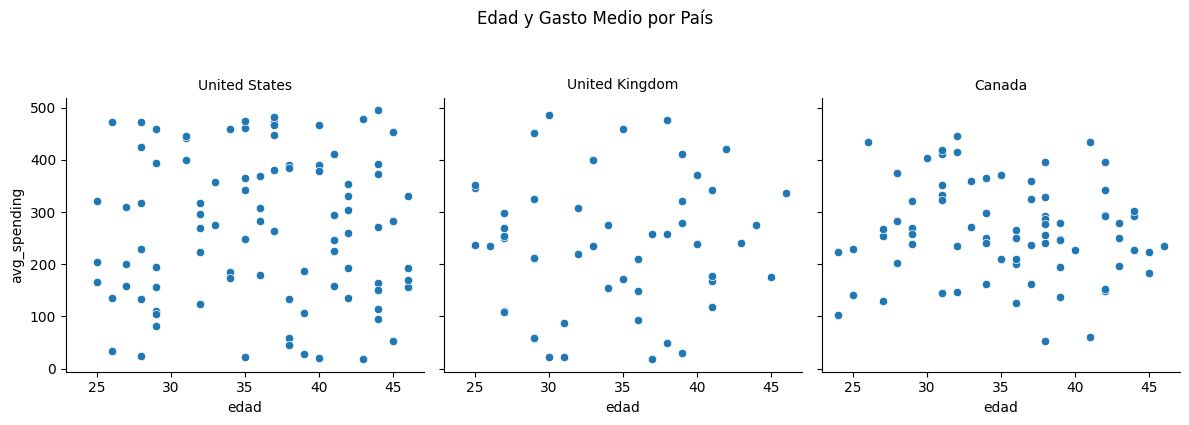

          country       edad  avg_spending
0   United States  36.076923    267.305430
1          Canada  35.355263    263.660334
2  United Kingdom  34.360000    243.308100


In [27]:
df_facet = pd.merge(users[["id", "edad", "country"]], avg_spending, left_on="id", right_on="user_id")

g = sns.FacetGrid(df_facet, col="country", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="edad", y="avg_spending")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Edad y Gasto Medio por País", y=1.05)
plt.tight_layout()
plt.show()
print(df_facet.groupby("country")[["edad", "avg_spending"]].mean().sort_values(by="avg_spending", ascending=False).reset_index())
